In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [36]:
train = pd.read_csv('train_LZdllcl (2) (1).csv')
test = pd.read_csv("test_2umaH9m (2).csv")
sample = pd.read_csv("sample_submission_M0L0uXE (2).csv")

In [37]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [39]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [40]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
import warnings
warnings.filterwarnings('ignore')

train.skew()

employee_id            -0.003128
no_of_trainings         3.445434
age                     1.007432
previous_year_rating   -0.310638
length_of_service       1.738061
KPIs_met >80%           0.619909
awards_won?             6.338914
avg_training_score      0.451908
is_promoted             2.972339
dtype: float64

In [41]:
train.drop('employee_id',axis=1,inplace=True)

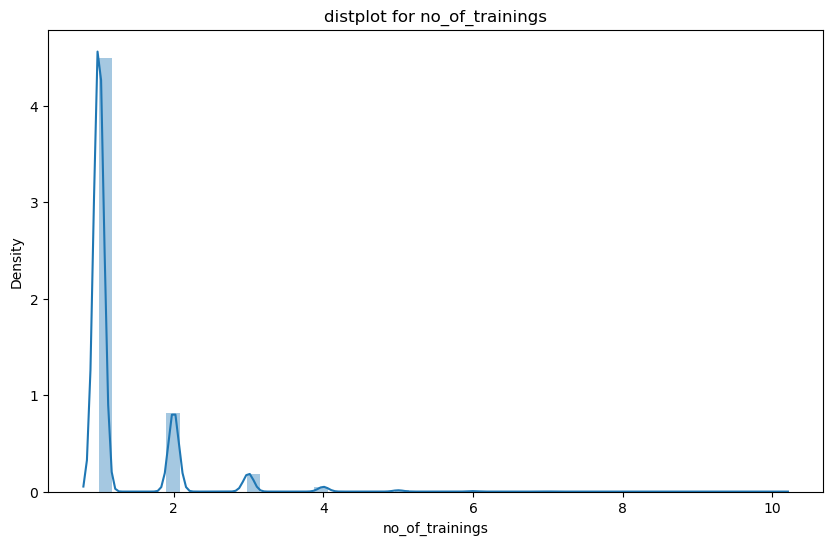

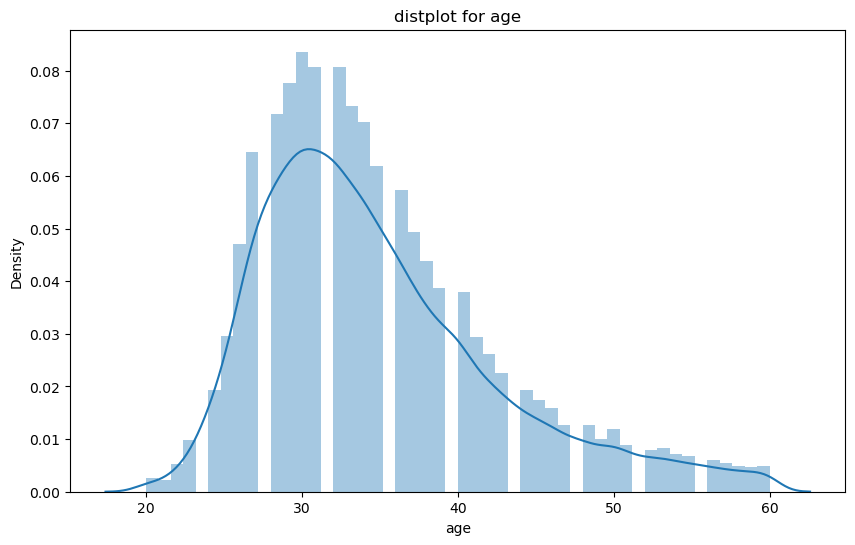

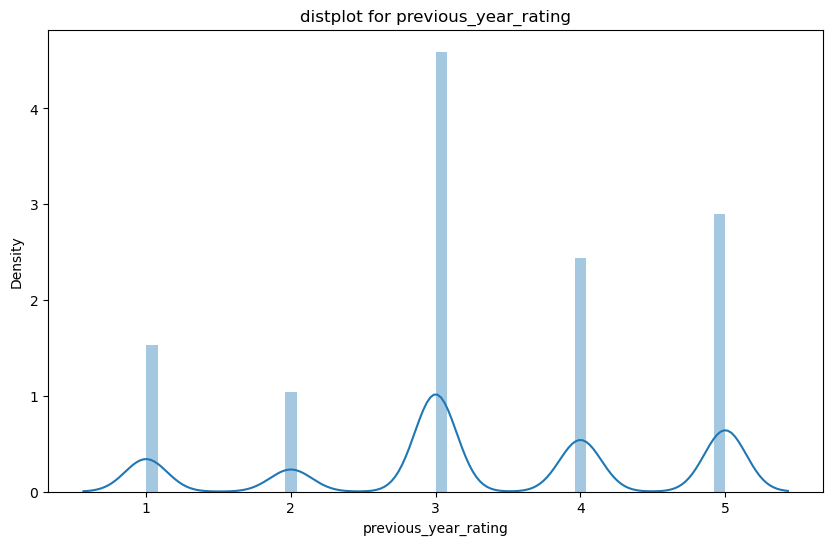

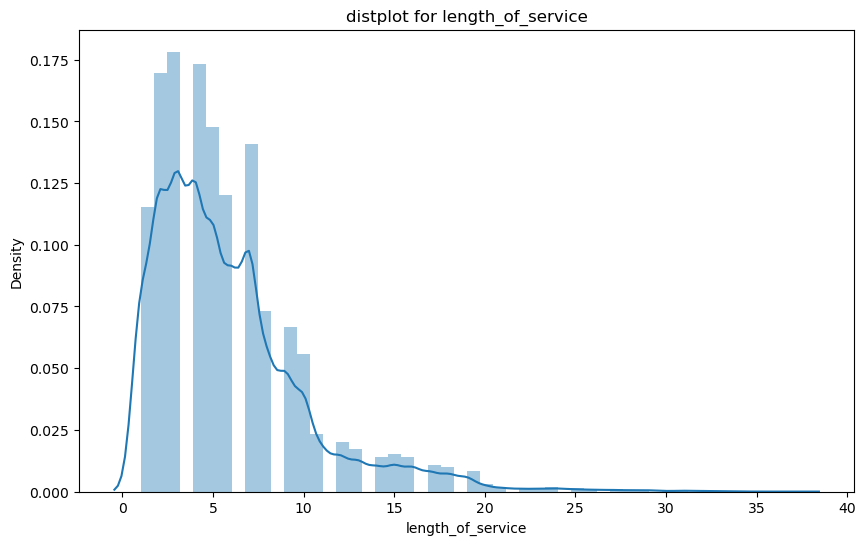

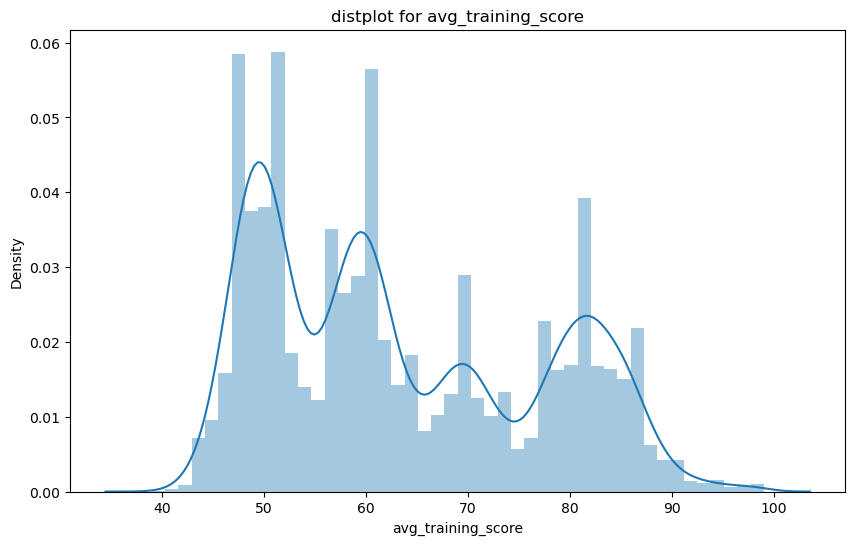

In [8]:
num_features = train.select_dtypes(include=[np.number])

for i in num_features:
  if i not in ['awards_won?','KPIs_met >80%','is_promoted','employee_id']:
    plt.figure(figsize=(10,6))
    sns.distplot(num_features[i])
    plt.title(f"distplot for {i}")
    plt.show()

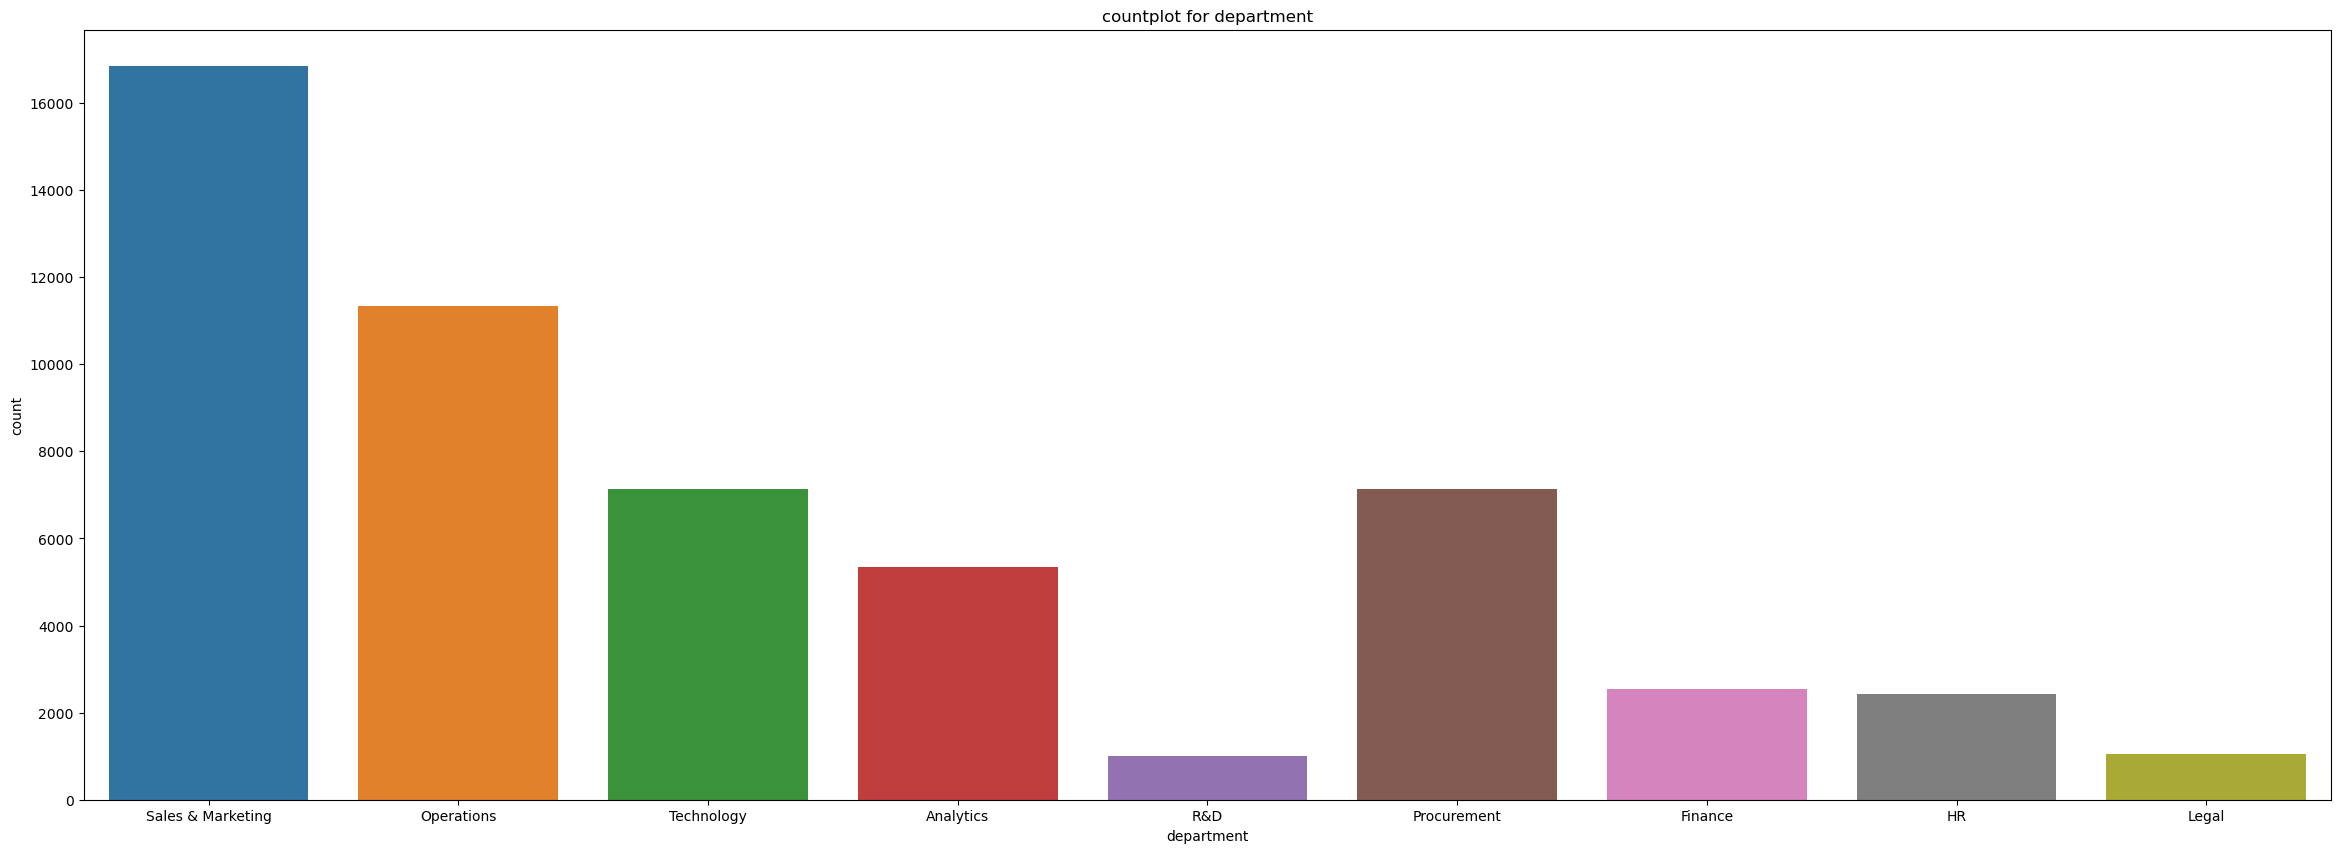

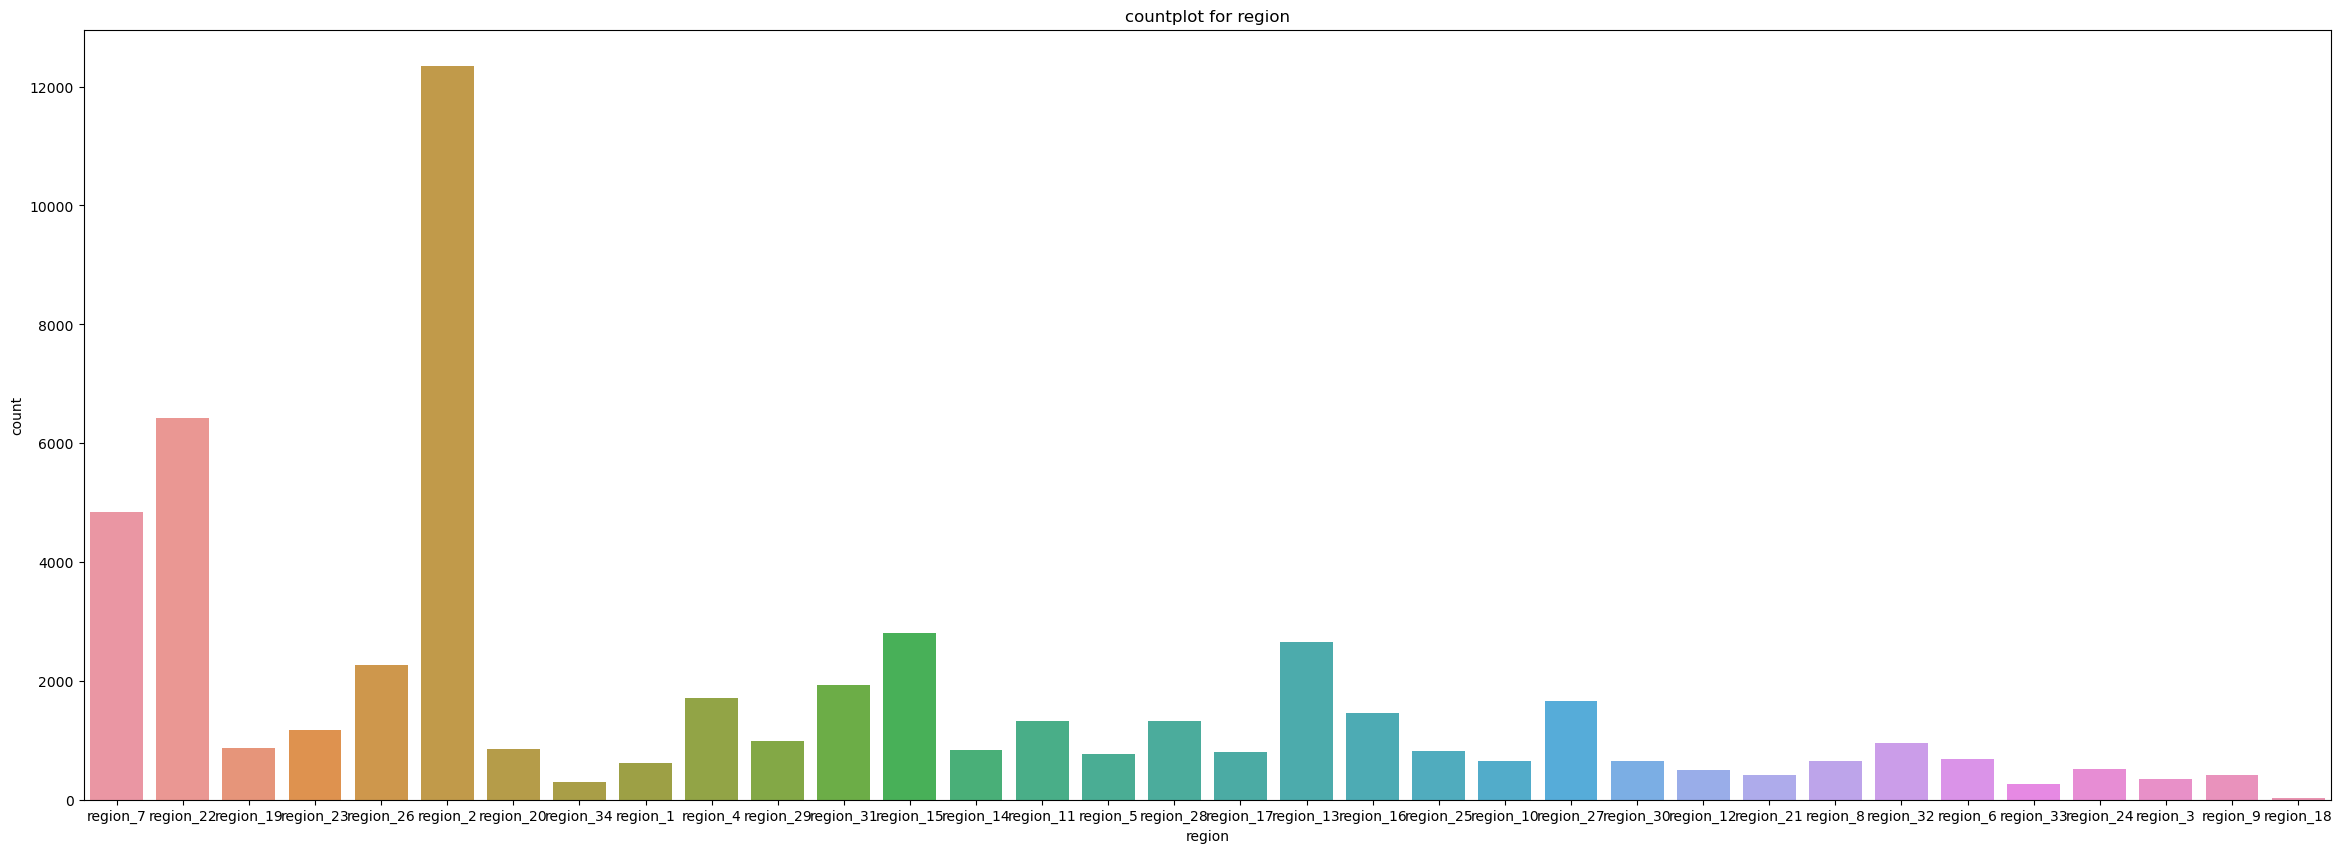

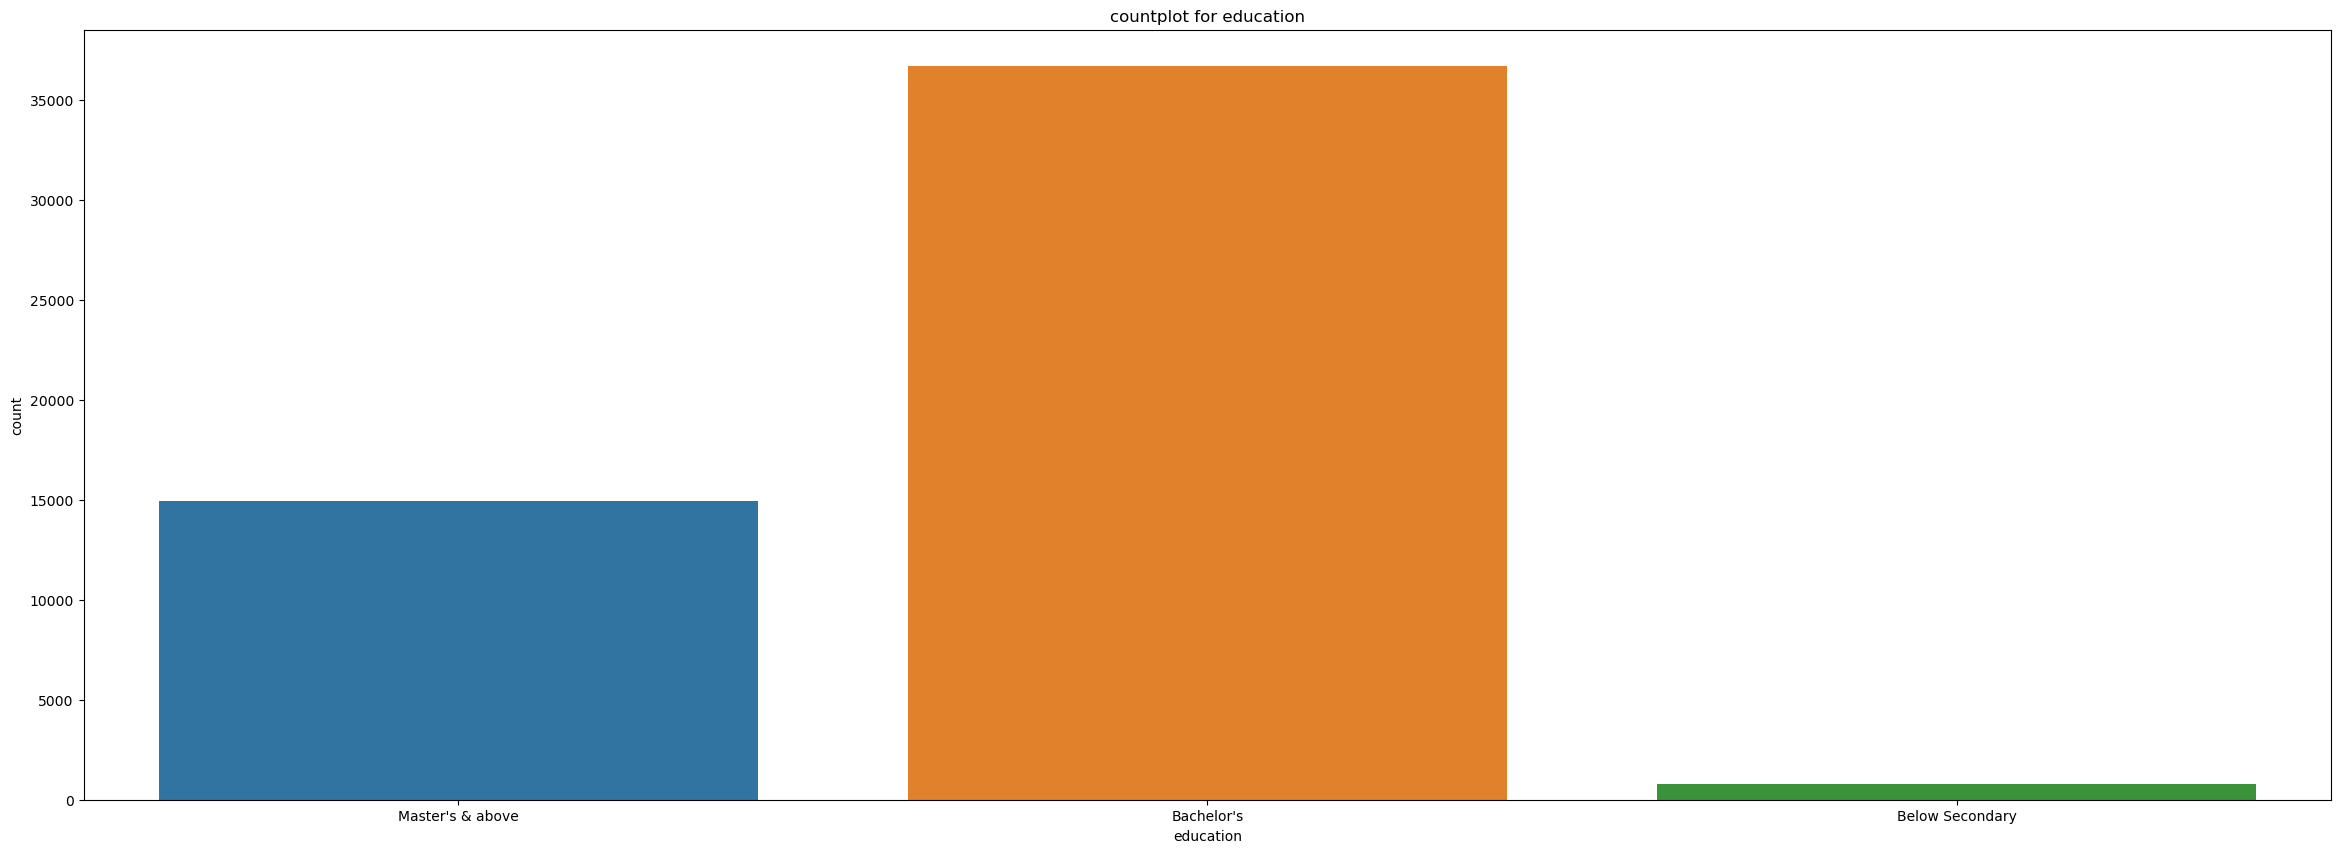

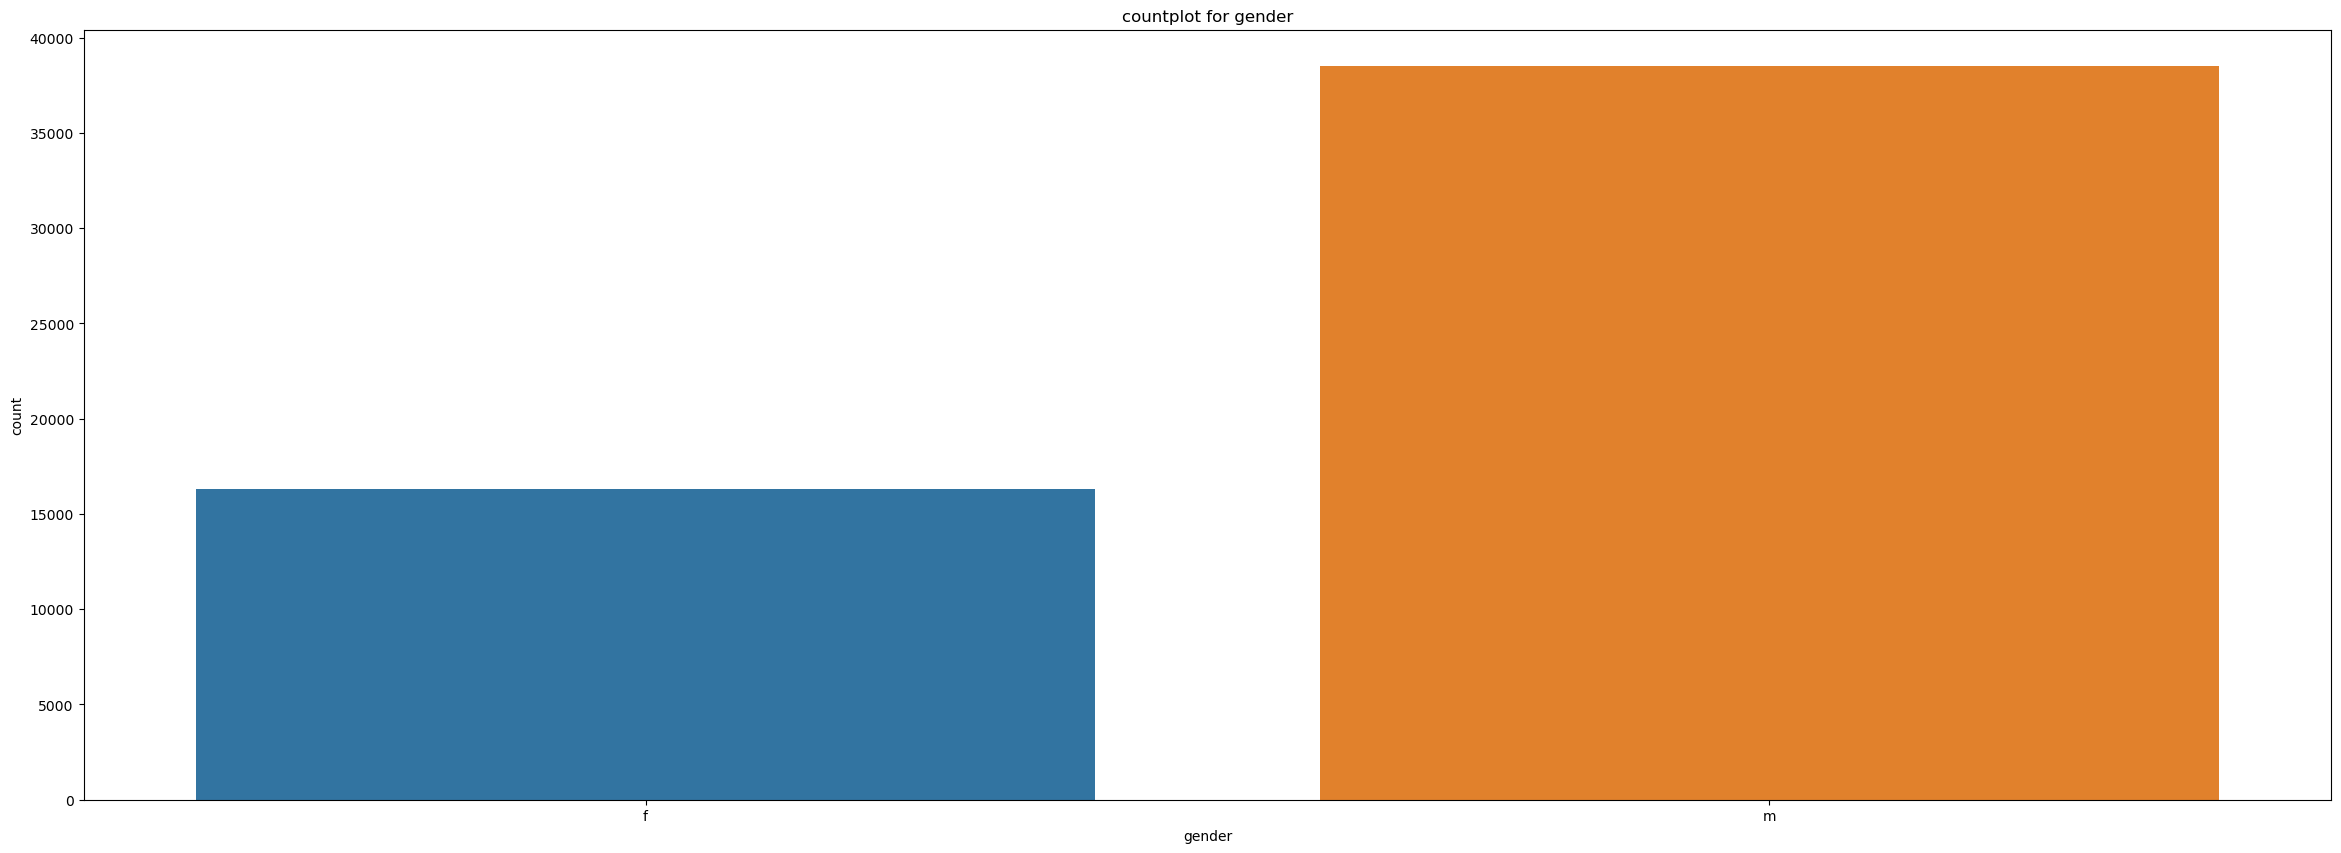

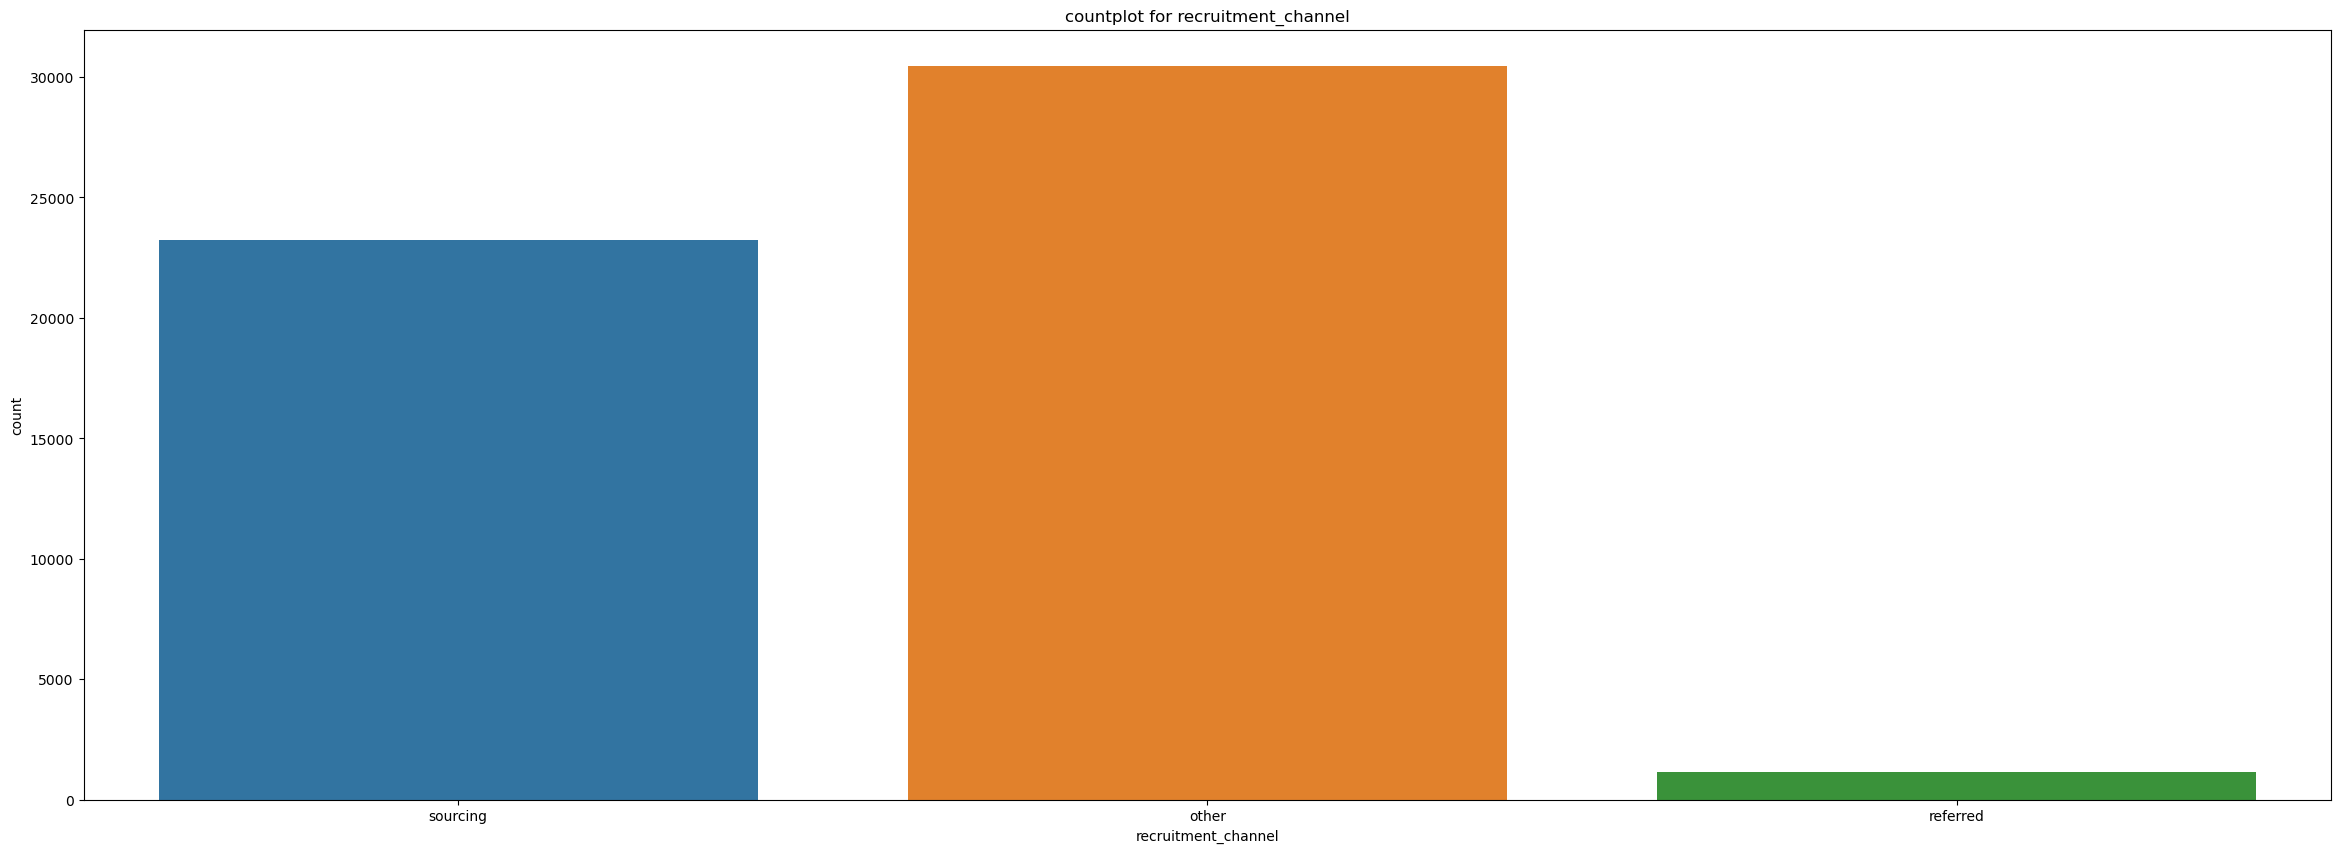

In [9]:
categ_features = train.select_dtypes(include='object')
 
for i in categ_features:
    plt.figure(figsize=(29,10))
    sns.countplot(categ_features[i])
    plt.title(f"countplot for {i}")
    plt.show()

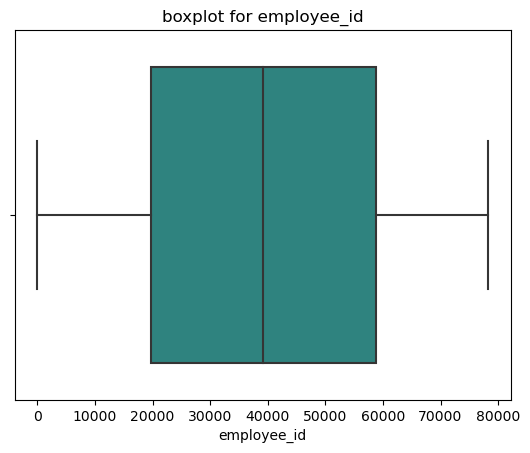

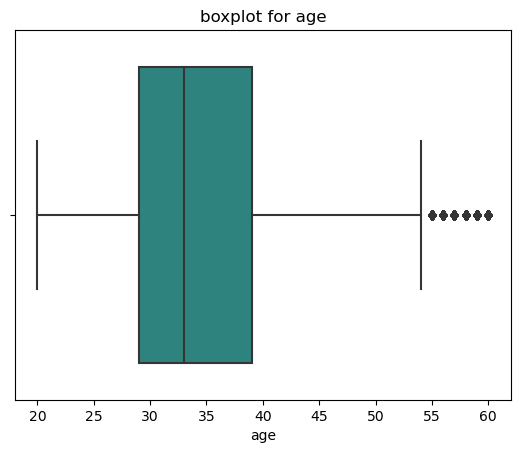

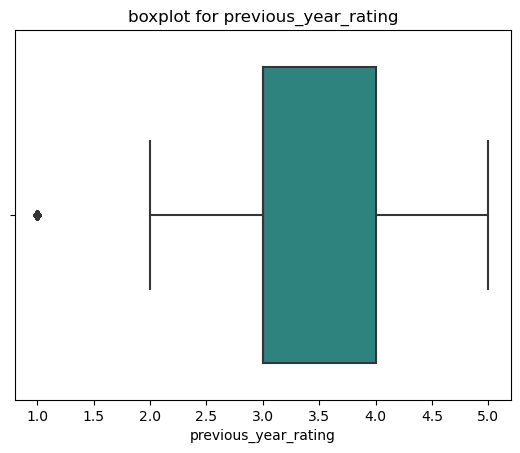

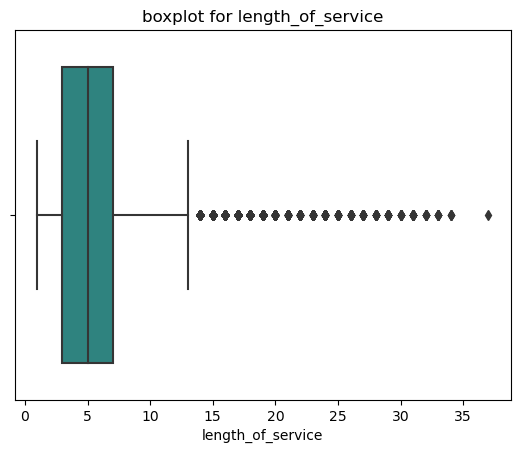

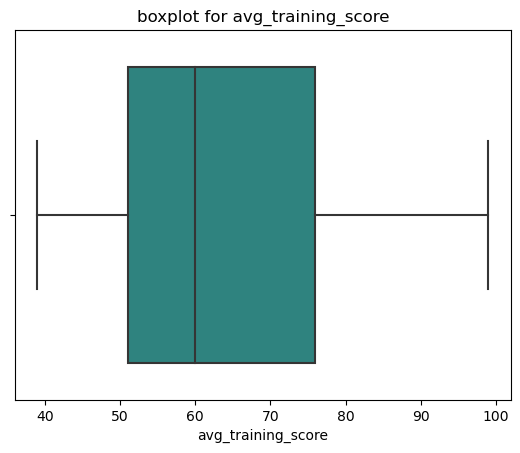

In [10]:
for i in num_features:
  if i not in ['awards_won?','KPIs_met >80%','no_of_trainings','is_promoted']:
    sns.boxplot(x = train[i], hue = train['is_promoted'],palette='viridis')
    plt.title(f"boxplot for {i}")
    plt.show()

<AxesSubplot:>

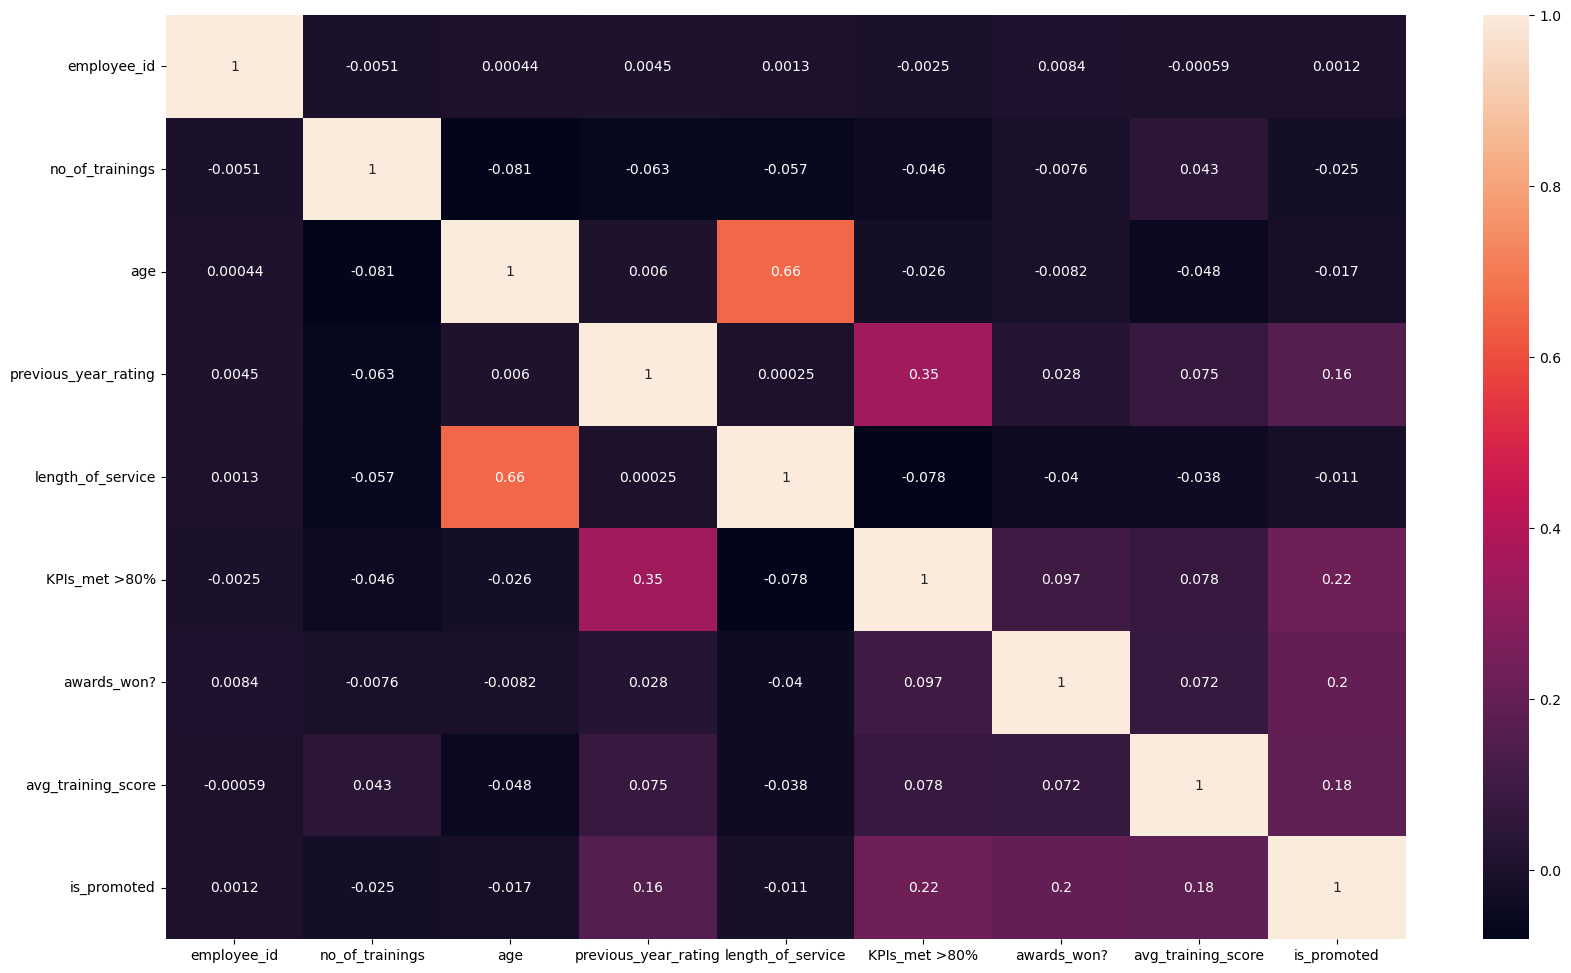

In [11]:
plt.figure(figsize=(20,12))
sns.heatmap(train.corr(),annot=True)

In [12]:
from scipy.stats import chi2_contingency

def chi2(var1,var2):
    table = pd.crosstab(var1,var2)
    _,p,_,_ = chi2_contingency(table)
    print(p)
    
    if p < 0.05:
        print("accept alternate hypothesis",round(p,2))
        
    else:
        print("fail to reject null hypothesis",round(p,2))

In [13]:
chi2(train['department'],train['is_promoted'])

9.882497107474632e-29
accept alternate hypothesis 0.0


In [14]:
chi2(train['region'],train['is_promoted'])

7.275378205784026e-80
accept alternate hypothesis 0.0


In [15]:
chi2(train['education'],train['is_promoted'])

1.0716517784616584e-08
accept alternate hypothesis 0.0


In [16]:
chi2(train['gender'],train['is_promoted'])

0.009765091521176657
accept alternate hypothesis 0.01


In [17]:
chi2(train['recruitment_channel'],train['is_promoted'])

6.650937825577018e-05
accept alternate hypothesis 0.0


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


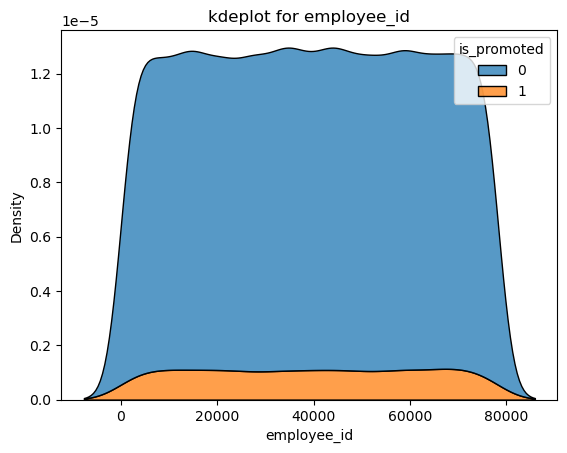

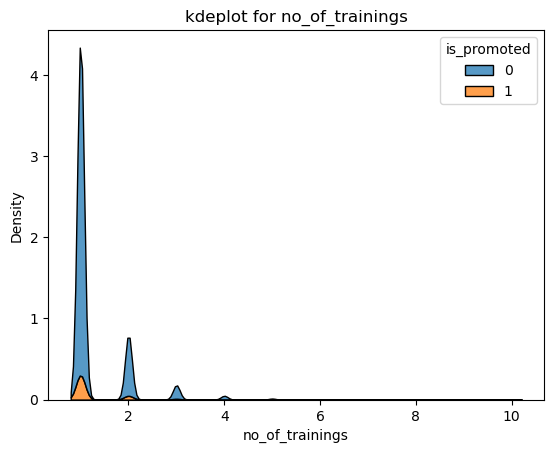

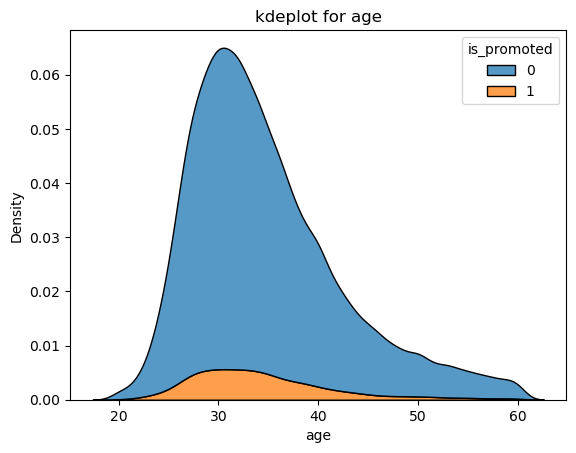

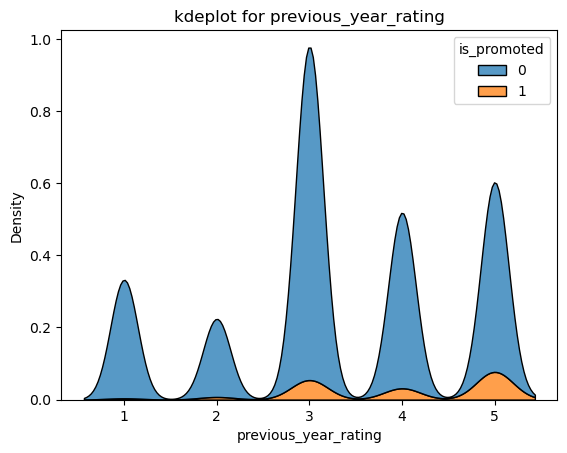

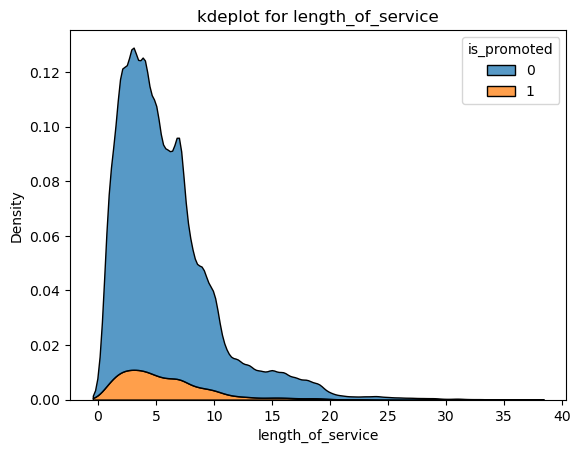

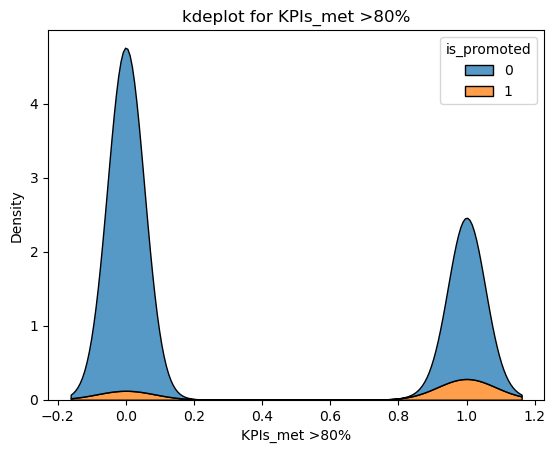

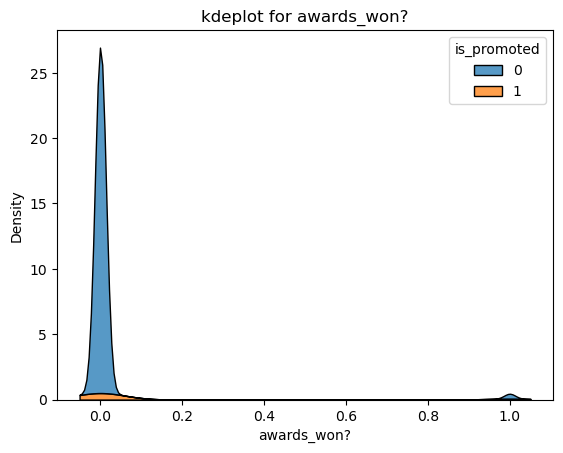

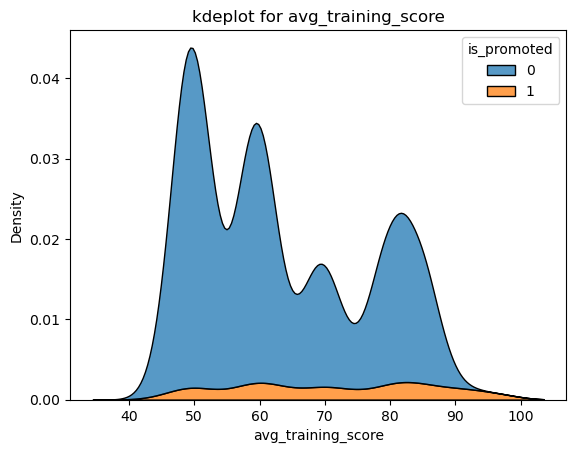

In [19]:
for i in num_features.columns:
    if i!= 'is_promoted':
        sns.kdeplot(num_features[i],hue=train['is_promoted'],multiple='stack')
        plt.title(f"kdeplot for {i}")
        plt.show()

In [20]:
def replace_null_values(df):
    for column in df.columns[df.isnull().any()]:
        if df[column].dtype == 'object':
            mode = df[column].mode().iloc[0]
            df[column].fillna(mode,inplace=True)
        elif df[column].dtype == 'float':
            median = df[column].median()
            df[column].fillna(median,inplace=True)

In [21]:
replace_null_values(train)

In [22]:
train_enc = pd.get_dummies(train)

In [23]:
train_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   employee_id                   54808 non-null  int64  
 1   no_of_trainings               54808 non-null  int64  
 2   age                           54808 non-null  int64  
 3   previous_year_rating          54808 non-null  float64
 4   length_of_service             54808 non-null  int64  
 5   KPIs_met >80%                 54808 non-null  int64  
 6   awards_won?                   54808 non-null  int64  
 7   avg_training_score            54808 non-null  int64  
 8   is_promoted                   54808 non-null  int64  
 9   department_Analytics          54808 non-null  uint8  
 10  department_Finance            54808 non-null  uint8  
 11  department_HR                 54808 non-null  uint8  
 12  department_Legal              54808 non-null  uint8  
 13  d

In [24]:
train['previous_year_rating'] = train['previous_year_rating'].astype('int')

In [25]:
y = train_enc['is_promoted']
x = train_enc.drop('is_promoted',axis=1)

In [42]:
from collections import Counter

over_sample = SMOTE()
x,y = over_sample.fit_resample(x,y)

counter = Counter(y)
counter

Counter({0: 50140, 1: 50140})

In [43]:
print(x.shape)
print(y.shape)

(100280, 59)
(100280,)


In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [46]:
x_train.columns

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'department_Analytics', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_1', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', 'region_region_33',
       'r

In [47]:
train_pred = logreg.predict(x_train)
test_pred = logreg.predict(x_test)

In [48]:
def model_eval(actual,pred):
  conf_mat = confusion_matrix(actual,pred)
  accur_score = accuracy_score(actual,pred)
  class_report = classification_report(actual,pred)
  print(conf_mat)
  print('accuracy score of the model is:',round(accur_score,2))
  print(class_report)

In [49]:
model_eval(y_train,train_pred)

[[29946  9997]
 [ 7934 32347]]
accuracy score of the model is: 0.78
              precision    recall  f1-score   support

           0       0.79      0.75      0.77     39943
           1       0.76      0.80      0.78     40281

    accuracy                           0.78     80224
   macro avg       0.78      0.78      0.78     80224
weighted avg       0.78      0.78      0.78     80224



In [50]:
model_eval(y_test,test_pred)

[[7558 2639]
 [1928 7931]]
accuracy score of the model is: 0.77
              precision    recall  f1-score   support

           0       0.80      0.74      0.77     10197
           1       0.75      0.80      0.78      9859

    accuracy                           0.77     20056
   macro avg       0.77      0.77      0.77     20056
weighted avg       0.77      0.77      0.77     20056



In [51]:
nb = GaussianNB()

nb.fit(x_train,y_train)

GaussianNB()

In [52]:
nb_train_predict = nb.predict(x_train)
nb_test_predict = nb.predict(x_test)

In [53]:
model_eval(y_test,nb_test_predict)

[[3221 6976]
 [ 377 9482]]
accuracy score of the model is: 0.63
              precision    recall  f1-score   support

           0       0.90      0.32      0.47     10197
           1       0.58      0.96      0.72      9859

    accuracy                           0.63     20056
   macro avg       0.74      0.64      0.59     20056
weighted avg       0.74      0.63      0.59     20056



In [ ]:
test.info()

In [ ]:
replace_null_values(test)

In [ ]:
test['previous_year_rating'] = test['previous_year_rating'].astype('int')

In [ ]:
test_enc = pd.get_dummies(test)

In [ ]:
test_enc.drop('employee_id',axis=1,inplace=True)

In [ ]:
test['is_promoted'] = rfc.predict(test_enc)

In [ ]:
test['is_promoted']

In [ ]:
test_pred

In [ ]:
sample.head()

In [ ]:
sample['is_promoted'] = test['is_promoted']

In [ ]:
sample.to_csv('submission_file.csv',index=False)

In [54]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [55]:
random_train_pred = rfc.predict(x_train)
random_test_pred = rfc.predict(x_test)

In [56]:
model_eval(y_train,random_train_pred)

[[39943     0]
 [    1 40280]]
accuracy score of the model is: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39943
           1       1.00      1.00      1.00     40281

    accuracy                           1.00     80224
   macro avg       1.00      1.00      1.00     80224
weighted avg       1.00      1.00      1.00     80224



In [57]:
model_eval(y_test,random_test_pred)

[[10155    42]
 [  676  9183]]
accuracy score of the model is: 0.96
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10197
           1       1.00      0.93      0.96      9859

    accuracy                           0.96     20056
   macro avg       0.97      0.96      0.96     20056
weighted avg       0.97      0.96      0.96     20056



In [58]:
import pickle

In [60]:
pickle.dump(rfc,open('model.pkl','wb'))

In [61]:
pickle.dump(rfc, open("model2.pkl", "wb"))